# Versions

v1: Base Script

v2: Instead of getting the tiem of each subtitle, got the end time of each scene and subtracted 
    Removed scene descriptiors like (CRASH IN BACKGROUND), (ROCK MUSIC), (BIRDS TWITTERING) etc... 

v3: Modularize and make plots

## Imports

In [1]:
import pandas as pd
import re 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Helper Functions

In [3]:
def get_wps(df):
    """
    Get the average words per minute for the entire movie
    """
    seconds = df.tail(1).index.values[0]
    words = df.tail(1).values[0][0]
    
    return round(words/seconds,2)

In [4]:
def clean_text(line):
    """
    General string cleaning for these files
    Removes html tags, leading dashes, and all scenn descriptors ex: (MUSIC IN BACKGROUND)
    """
    clean = line.strip().replace('</i>', '').replace('<i>','').replace('- ', '')
    
    clean = re.sub('\(.*\)','', clean)
    clean = re.sub('\[.*\]','', clean)
    clean = re.sub('♪', '', clean)
    
    return(clean)
    

In [5]:
def is_time(line): 
    """
    Checks the current line to see if it's the time of the scene 
    """
    if re.match("[0-9][0-9]:", line):
        out = True
    else:
        out = False
        
    return out

In [6]:
def get_scene_end(line): 
    """
    Grab the end time of a frame's subtitles
    """
    line = line.strip()
    end = line.split(' --> ')[1]
    
    end_dt = datetime.strptime(end, '%H:%M:%S,%f')
    
    return(end_dt)
    

In [7]:
def count_words(line):
    """
    Count the number of words in a line
    """
    out = len(line.split(' '))
    return out

In [8]:
def parse_file(file_path):    
    """
    Main function for parsing a file it works as follow: 
        1. Open the file and read each line 
        2. Clean each line as you go 
        3. If it's just a subtitle number skip it
        4. If it's a timestamp, grab the end time of the scene
        5. If it's text, count the number of words 
    """
    
    base_time = datetime(1900, 1, 1, 0, 0, 0, 0)
    total_time = 0
    total_words = 0 
    dict_list = []


    with open(file_path, "r") as file: 
        # Read in all the lines
        lines = file.readlines()

        # Skip the first line with the weird /ueff stuff
        lines = lines[1:]

        # Start the loop 
        for line in lines: 
            line = clean_text(line)

            if line and (not line.isnumeric()): # skips the blank and line number
                if is_time(line):
                    total_time = (get_scene_end(line) - base_time).seconds
                else:
                    total_words += count_words(line)

            d = {
                'seconds': total_time, 
                'word_count': total_words
            }

            dict_list.append(d)        


    # Create fivethirtyeight dataframe
    script_df = pd.DataFrame(dict_list)
    script_df = pd.DataFrame(script_df.groupby(['seconds'])['word_count'].max())

    return script_df

## Parse the .srt Files

In [35]:
# Horror Movies
the_exorcist = parse_file('the_exorcist.srt')
the_shining = parse_file('the_shining.srt')
halloween = parse_file('halloween.srt')
the_conjuring = parse_file('the_conjuring.srt')
friday_the_thirteenth = parse_file('friday_the_thirteenth.srt')

# Action
die_hard = parse_file('die_hard.srt')
the_matrix = parse_file('the_matrix.srt')
the_dark_knight = parse_file('the_dark_knight.srt')
the_terminator = parse_file('the_terminator.srt')
gladiator = parse_file('gladiator.srt')

# Comedies
the_hangover = parse_file('the_hangover.srt')
superbad = parse_file('superbad.srt')
wedding_crashers = parse_file('wedding_crashers.srt')
animal_house = parse_file('animal_house.srt')
billy_madison = parse_file('billy_madison.srt')

# Boston
social_network = parse_file('the_social_network.srt')
good_will_hunting = parse_file('good_will_hunting.srt')
fever_pitch = parse_file('fever_pitch.srt')
gone_baby_gone = parse_file('gone_baby_gone.srt')
mystic_river = parse_file('mystic_river.srt')
patriots_day = parse_file('patriots_day.srt')
the_boondock_saints = parse_file('the_boondock_saints.srt')
the_departed = parse_file('the_departed.srt')
the_fighter = parse_file('the_fighter.srt')
the_town = parse_file('the_town.srt')

Text(0.5,1,'Movie Word Count over Time')

Text(0.5,0,'Seconds')

Text(0,0.5,'Word Count')

(-30, 9088.05)

(-50, 18005.2)

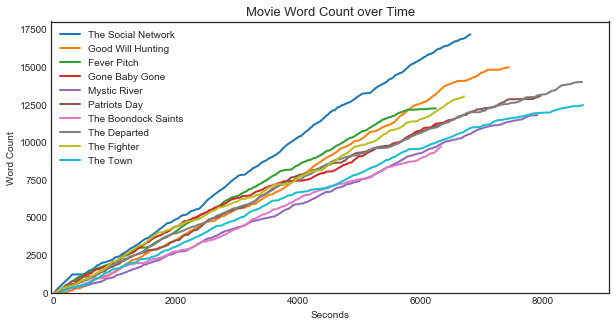

In [26]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
width = 2

ax.plot(social_network.word_count, linewidth=width)
ax.plot(good_will_hunting.word_count, linewidth=width)
ax.plot(fever_pitch.word_count, linewidth=width)
ax.plot(gone_baby_gone.word_count, linewidth=width)
ax.plot(mystic_river.word_count, linewidth=width)
ax.plot(patriots_day.word_count, linewidth=width)
ax.plot(the_boondock_saints.word_count, linewidth=width)
ax.plot(the_departed.word_count, linewidth=width)
ax.plot(the_fighter.word_count, linewidth=width)
ax.plot(the_town.word_count, linewidth=width)

ax.set_title('Movie Word Count over Time', fontsize=13)
ax.set_xlabel('Seconds', fontsize = 10)
ax.set_ylabel('Word Count', fontsize = 10)

ax.set_xlim(-30)
ax.set_ylim(-50)


ax.legend(labels = ['The Social Network', 
            'Good Will Hunting', 
            'Fever Pitch', 
            'Gone Baby Gone', 
            'Mystic River', 
            'Patriots Day', 
            'The Boondock Saints', 
            'The Departed', 
            'The Fighter', 
            'The Town']
         )

plt.show()
fig.savefig('total_view.png')

Text(0.5,1,'Movie Word Count over Time')

Text(0.5,0,'Seconds')

Text(0,0.5,'Word Count')

(0, 600)

(0, 2000)

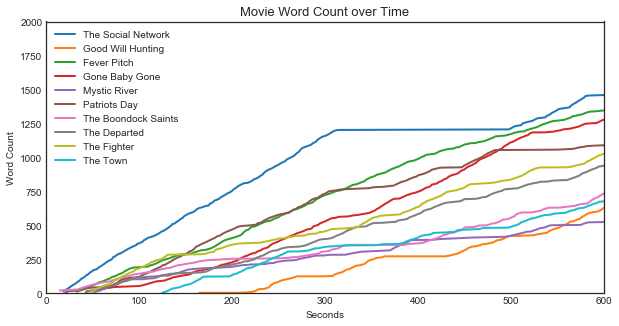

In [25]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

width = 2

ax.plot(social_network.word_count, linewidth=width)
ax.plot(good_will_hunting.word_count, linewidth=width)
ax.plot(fever_pitch.word_count, linewidth=width)
ax.plot(gone_baby_gone.word_count, linewidth=width)
ax.plot(mystic_river.word_count, linewidth=width)
ax.plot(patriots_day.word_count, linewidth=width)
ax.plot(the_boondock_saints.word_count, linewidth=width)
ax.plot(the_departed.word_count, linewidth=width)
ax.plot(the_fighter.word_count, linewidth=width)
ax.plot(the_town.word_count, linewidth=width)

ax.set_title('Movie Word Count over Time', fontsize=13)
ax.set_xlabel('Seconds', fontsize = 10)
ax.set_ylabel('Word Count', fontsize = 10)

ax.set_xlim(0, 600)
ax.set_ylim(0, 2000)

ax.legend(['The Social Network', 
            'Good Will Hunting', 
            'Fever Pitch', 
            'Gone Baby Gone', 
            'Mystic River', 
            'Patriots Day', 
            'The Boondock Saints', 
            'The Departed', 
            'The Fighter', 
            'The Town']
         )

plt.show()
fig.savefig('first_few_min.png')


## Plot WPS 

In [15]:
social_network_wps = get_wps(social_network)
good_will_hunting_wps = get_wps(good_will_hunting)
fever_pitch_wps = get_wps(fever_pitch)
gone_baby_gone_wps = get_wps(gone_baby_gone)
mystic_river_wps = get_wps(mystic_river)
patriots_day_wps = get_wps(patriots_day)
the_boondock_saints_wps = get_wps(the_boondock_saints)
the_departed_wps = get_wps(the_departed)
the_fighter_wps = get_wps(the_fighter)
the_town_wps = get_wps(the_town)

In [16]:
vector = [social_network_wps,
    good_will_hunting_wps,
    fever_pitch_wps,
    the_fighter_wps,
    gone_baby_gone_wps,
    patriots_day_wps,
    the_departed_wps,
    the_boondock_saints_wps,
    mystic_river_wps,
    the_town_wps]

names = ['The Social Network',
        'Good Will Hunting', 
        'Fever Pitch', 
        'The Fighter', 
        'Gone Baby Gone', 
        'Patriots Day', 
        'The Departed',
        'The Boondock Saints', 
        'Mystic River', 
        'The Town']

y_pos = np.arange(len(vector))

/Users/Eric/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x1234fd160>,
 <a list of 10 Text xticklabel objects>)

Text(0.5,1,'Average Words per Second')

Text(0.5,0,'Movie')

Text(0,0.5,'Words per Second')

(0.5, 2.646)

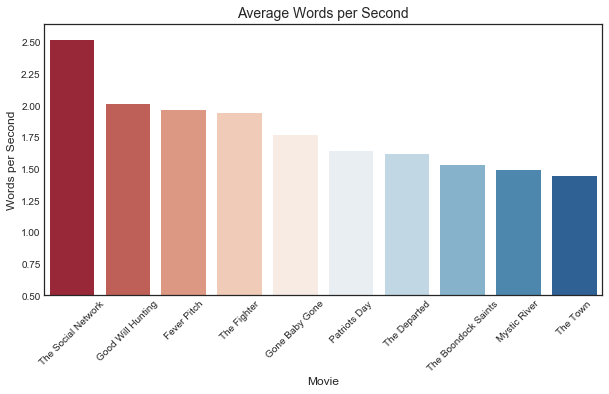

In [33]:
plt.figure(figsize=(10, 5))

chart = sns.barplot(x=names, y=vector, palette='RdBu')

plt.xticks(y_pos, names, rotation=45)
plt.title('Average Words per Second', fontsize=14)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Words per Second', fontsize=12)
plt.ylim(.5)
plt.show()

fig = chart.get_figure()
fig.savefig('average_wps.png')

## Plot All

Text(0.5,1,'Movie Word Count over Time')

Text(0.5,0,'Seconds')

Text(0,0.5,'Word Count')

(0, 10310.8)

(0, 18005.4)

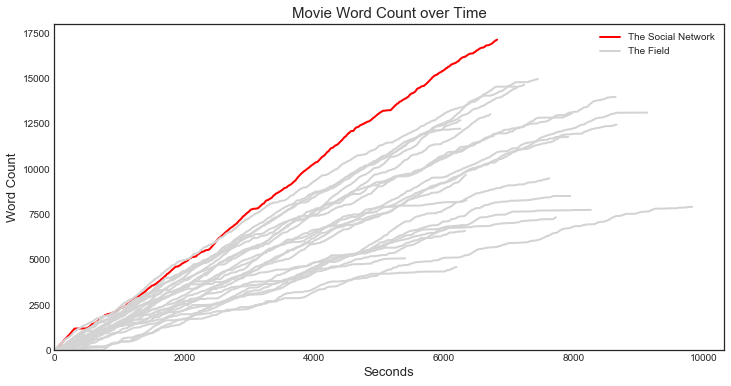

In [36]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
width = 2

field_color = 'lightgray'

ax.plot(social_network.word_count, linewidth=width, color='red')
ax.plot(good_will_hunting.word_count, linewidth=width, color=field_color)
ax.plot(fever_pitch.word_count, linewidth=width, color=field_color)
ax.plot(gone_baby_gone.word_count, linewidth=width, color=field_color)
ax.plot(mystic_river.word_count, linewidth=width, color=field_color)
ax.plot(patriots_day.word_count, linewidth=width, color=field_color)
ax.plot(the_boondock_saints.word_count, linewidth=width, color=field_color)
ax.plot(the_departed.word_count, linewidth=width, color=field_color)
ax.plot(the_fighter.word_count, linewidth=width, color=field_color)
ax.plot(the_town.word_count, linewidth=width, color=field_color)
ax.plot(the_exorcist.word_count, linewidth=width, color=field_color)
ax.plot(the_shining.word_count, linewidth=width, color=field_color)
ax.plot(halloween.word_count, linewidth=width, color=field_color)
ax.plot(the_conjuring.word_count, linewidth=width, color=field_color)
ax.plot(friday_the_thirteenth.word_count, linewidth=width, color=field_color)
ax.plot(die_hard.word_count, linewidth=width, color=field_color)
ax.plot(the_matrix.word_count, linewidth=width, color=field_color)
ax.plot(the_dark_knight.word_count, linewidth=width, color=field_color)
ax.plot(the_terminator.word_count, linewidth=width, color=field_color)
ax.plot(gladiator.word_count, linewidth=width, color=field_color)
ax.plot(the_hangover.word_count, linewidth=width, color=field_color)
ax.plot(superbad.word_count, linewidth=width, color=field_color)
ax.plot(wedding_crashers.word_count, linewidth=width, color=field_color)
ax.plot(animal_house.word_count, linewidth=width, color=field_color)
ax.plot(billy_madison.word_count, linewidth=width, color=field_color)


ax.set_title('Movie Word Count over Time', fontsize=15)
ax.set_xlabel('Seconds', fontsize = 13)
ax.set_ylabel('Word Count', fontsize = 13)

ax.set_xlim(0)
ax.set_ylim(0)

ax.legend(['The Social Network', 'The Field'])

plt.show()

fig.savefig('all_movies.png')